<a href="https://colab.research.google.com/github/racheltu2020/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Tuesday_Statistics_Q%26A_DS16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-12 21:49:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-05-12 21:49:11 (277 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'y':1, 'n':0, '?': np.NaN})

In [0]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


What are we trying to show/ with a confidence interval? Or capture within the confidence interval?

We build a confidence interval around a sample mean, with the goal of showing (with 95% probability) where the **population** mean lies. 

In [0]:
rep = df[df['party']=='republican']

rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
### Step 1 - I need a *sample* mean

rep['education'].mean()

0.8709677419354839

In [0]:
rep_education_cleaned = rep['education'].dropna()

In [0]:
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [0]:
print(len(rep_education_cleaned))

155


In [0]:
lower, mean, upper = confidence_interval(rep_education_cleaned)
print(lower)
print(mean)
print(upper)

0.8176017935029393
0.8709677419354839
0.9243336903680285


If there was some larger group, that the republicans in the house representatives were larger random sample of that group, this confidence interval would capture that larger population's true mean, with 95% probability 

## Another Confidence Interval Example:

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/churn.csv', na_values='?')

print(df.shape)
df.head()

(3333, 21)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415.0,382-4657,no,yes,25,265.1,110,NaN,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False.
1,OH,107,415.0,371-7191,no,yes,26,161.6,123,NaN,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False.
2,NJ,137,415.0,358-1921,no,no,0,243.4,114,NaN,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False.
3,OH,84,408.0,375-9999,yes,no,0,299.4,71,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False.
4,OK,75,415.0,330-6626,yes,no,0,166.7,113,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3.0,2.73,3,False.


In [0]:
# What is the average number of night minutes for individuals who have this phone carrier

sample = df.sample(30)

sample.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1859,IL,116,510.0,360-7477,NaN,no,0,164.6,110,27.98,NaN,103.0,23.00,230.4,109,10.37,8.0,3.0,2.16,0,False.
2191,RI,113,415.0,415-2865,no,no,0,90.6,130,15.40,170.6,100.0,14.50,137.4,74,6.18,5.4,9.0,NaN,1,False.
1969,SD,52,510.0,358-6672,no,yes,20,133.3,63,22.66,184.1,123.0,15.65,272.9,107,12.28,13.5,2.0,3.65,1,False.
400,GA,98,NaN,333-5430,no,yes,31,121.0,105,20.57,218.9,98.0,18.61,226.7,110,10.20,12.0,NaN,3.24,1,False.
2296,KY,109,415.0,384-6372,no,no,0,175.6,80,29.85,238.0,94.0,20.23,198.4,103,8.93,10.2,6.0,2.75,1,False.


In [0]:
sample.isnull().sum()

State             0
Account Length    0
Area Code         2
Phone             0
Int'l Plan        5
VMail Plan        4
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          2
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      4
Intl Mins         0
Intl Calls        3
Intl Charge       6
CustServ Calls    0
Churn?            0
dtype: int64

In [0]:
# drop NaNs before calculating the confidence interval

sample_cleaned = sample['Night Mins'].dropna()

sample_cleaned.isnull().sum()

0

In [0]:
len(sample_cleaned)

30

In [0]:
lower, mean, upper = confidence_interval(sample_cleaned)

print(lower)
print(mean)
print(upper)

184.6505234380937
201.7133333333333
218.77614322857292


We would expect this confidence interval to capture the population value with 95% likelihood

In [0]:
df['Night Mins'].mean()

200.87203720372048

## What if I had taken a larger sample?

In [0]:
sample = df.sample(300)

night_mins = sample['Night Mins'].dropna()

lower, mean, upper = confidence_interval(night_mins)

print(lower)
print(mean)
print(upper)


197.52860376053343
202.98399999999998
208.43939623946653


## Confidence intervals are about communicating the "Precision" of an estimate (sample mean)

### Precision vs Accuracy

![Precision vs Accuracy](https://www.researchgate.net/profile/Anni_Helena_Ruotsala/publication/304674901/figure/fig6/AS:668649476067338@1536429866393/Precision-versus-accuracy-The-bullseye-represents-the-true-value-eg-the-true.ppm)

Comparing multiple confidence intervals is usually more interesting than calculating just a single interval.

In [0]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
rep = df[df['party']=='republican']

rep

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
10,republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,republican,n,n,n,y,y,y,y,y,n,y,n,y,y,y,n,y
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [0]:
rep = rep.replace({'y': 1, 'n': 0, '?': np.NaN})

In [0]:
issues = rep.drop('party', axis=1)

issues.columns

Index(['handicapped-infants', 'water-project', 'budget',
       'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
       'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration',
       'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free',
       'south-africa'],
      dtype='object')

In [0]:
confidence_intervals = []

for col in issues.columns:
  col_cleaned = issues[col].dropna()
  confidence_intervals.append(confidence_interval(col_cleaned))

confidence_intervals

#df['lower'] = pd.Series(lower_bounds_list)

[(0.12765166444807918, 0.18787878787878787, 0.24810591130949655),
 (0.42526571045979167, 0.5067567567567568, 0.5882478030537219),
 (0.08143520131697565, 0.13414634146341464, 0.18685748160985363),
 (0.9710067448304756, 0.9878787878787879, 1.0047508309271003),
 (0.9183979451371699, 0.9515151515151515, 0.9846323578931332),
 (0.850987486003394, 0.8975903614457831, 0.9441932368881721),
 (0.17420089269707362, 0.24074074074074073, 0.30728058878440784),
 (0.09595477158126557, 0.15286624203821655, 0.20977771249516752),
 (0.06593485907282265, 0.11515151515151516, 0.16436817123020767),
 (0.4809959592103161, 0.5575757575757576, 0.6341555559411991),
 (0.0788755652396695, 0.1320754716981132, 0.18527537815655692),
 (0.8176017935029393, 0.8709677419354839, 0.9243336903680285),
 (0.8061858971620528, 0.8607594936708861, 0.9153330901797194),
 (0.960253517544598, 0.9813664596273292, 1.0024794017100602),
 (0.044394355010013827, 0.08974358974358974, 0.13509282447716567),
 (0.5796460416043707, 0.657534246575

In [0]:
CI = pd.DataFrame(confidence_intervals)
CI.columns = ['lower', 'mean', 'upper']
CI['moe']  = CI['upper'] - CI['mean'] 
CI.head(16)

,lower,mean,upper,moe
0,0.127652,0.187879,0.248106,0.060227
1,0.425266,0.506757,0.588248,0.081491
2,0.081435,0.134146,0.186857,0.052711
3,0.971007,0.987879,1.004751,0.016872
4,0.918398,0.951515,0.984632,0.033117
5,0.850987,0.897590,0.944193,0.046603
6,0.174201,0.240741,0.307281,0.066540
7,0.095955,0.152866,0.209778,0.056911
8,0.065935,0.115152,0.164368,0.049217
9,0.480996,0.557576,0.634156,0.076580


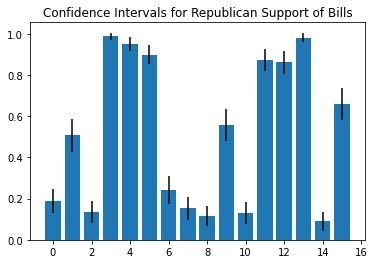

In [0]:
plt.bar(x=range(0,16,1), height=CI['mean'], yerr=CI['moe'])
plt.title("Confidence Intervals for Republican Support of Bills")
plt.show()

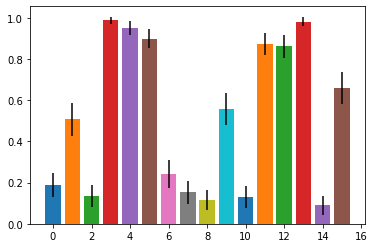

In [0]:
for i, interval in enumerate(confidence_intervals):
  plt.bar(x=i, height=interval[1], yerr=(interval[2] - interval[1]))

# Calculating the chi^2 statistic

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
observed = pd.crosstab(df['sex'], df['race'])
observed

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,119,346,1555,109,8642
Male,192,693,1569,162,19174


In [0]:
margins = pd.crosstab(df['sex'], df['race'], margins=True)

margins

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
sex,,,,,,
Female,119,346,1555,109,8642,10771
Male,192,693,1569,162,19174,21790
All,311,1039,3124,271,27816,32561


In [0]:
# Proportion of census responders who were black. 
3214 / 32561

0.09870704216700961

In [0]:
1569 / 21790

0.07200550711335475

In [0]:
1555 / 10771

0.14436913935567727

1) Null Hypothesis:

There is no relationship between race and sex (they're independent)

2) Alternative Hypothesis

There is a relationshipo

3) Confidence Level: 95%

## Calculate the expected value table

\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
col_totals = margins.iloc[2:3, 0:5].values[0]

col_totals

array([  311,  1039,  3124,   271, 27816])

In [0]:
row_totals = margins.iloc[0:2, 5:7].values.T[0]

row_totals

array([10771, 21790])

In [0]:
sample_size = len(df)

sample_size

32561

In [0]:
import numpy as np

expected = []
for i in range(len(row_totals)):
  expected_row = []
  for column in col_totals:
    expected_val = column*row_totals[i]/sample_size
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 5)
[[  102.87709223   343.69549461  1033.40204539    89.64531188
   9201.3800559 ]
 [  208.12290777   695.30450539  2090.59795461   181.35468812
  18614.6199441 ]]


In [0]:
chi2 = ((observed - expected)**2 / expected).sum().sum()

chi2

454.2671089131088